## Section A. Model Complexity and Model Selection

## Question 1 [KNN Regressor, 20 Marks]

### Load Libraries

In [146]:
# used libraries
library(reshape2)
library(ggplot2)

In [147]:
# import data
train_1a  <-  read.csv("./Task1A_train.csv")
test_1a  <- read.csv("./Task1A_test.csv")

### 1. Implement the KNN regressor function:knn(train.data, train.label, test.data, K=3)

In [148]:
# extract x values as single column
train_1a_x  <-  train_1a[,1,drop = FALSE]
test_1a_x  <-  test_1a[,1,drop = FALSE]

In [185]:
# KNN function (distance = manhattan)
knn <- function(train.data, train.label, test.data, K=K, distance = 'manhattan'){
    ## count number of train samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)
    
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    
    ## for each test sample...
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ###... and calculate the predicted values according to the average
        test_1a$y[i]<- sum(train.label[nn])/K
        
    }
    
    ## return the predictions as output
    return (test_1a$y)
}

In knn for classification, mode is used to calcculate the predicted labels. In knn regression, average is used to calculate the predicted values.

In [179]:
# prediction of knn for test samples when k = 3
knn(train_1a_x, train_1a$y, test_1a_x, K=3)

[1]  0.7233333  0.7233333  0.7933333  0.7500000  0.8533333  0.8233333
 [7]  0.9166667  0.9166667  1.0533333  1.1066667  1.1766667  1.2900000
[13]  1.5233333  1.5500000  1.7400000  1.6300000  1.9000000  2.0100000
[19]  2.4000000  2.5500000  3.0600000  3.3600000  3.5700000  4.2600000
[25]  4.7400000  5.1600000  5.6700000  6.0600000  6.5100000  6.6300000
[31]  7.2300000  7.5000000  7.9500000  8.5200000  9.1200000 10.3200000
[37] 11.1900000 12.6900000 13.6800000 15.0300000 15.6900000 15.6900000

In [180]:
# error function: root mean square error
RMSE <- function(predicted, target) {
    se <- 0
    for (i in 1:length(predicted)) {
        se <- se + (predicted[i]-target[i])^2
    }
    return (sqrt(se/length(predicted)))
}

In [181]:
# RMSE for k = 3
RMSE(knn(train_1a_x, train_1a$y, test_1a_x, K=3),test_1a$y)

[1] 1.305544

### 2. Plot the training and the testing errors versus

In [182]:
# Create a dataframe with three columns to store the RMSE results of k from 1 to 35 
RMSE_all <- data.frame('K'=1:35, 'train'=rep(0,35), 'test'=rep(0,35))

# calculate RMSE for K from 1:35 
for (k in 1:35){
    # calcuate trainning errors
    RMSE_all[k,'train'] <- RMSE(knn(train_1a_x, train_1a$y, test_1a_x, K=k),train_1a$y)
    # calculate testing errors
    RMSE_all[k,'test'] <-  RMSE(knn(train_1a_x, train_1a$y, test_1a_x, K=k), test_1a$y)
}

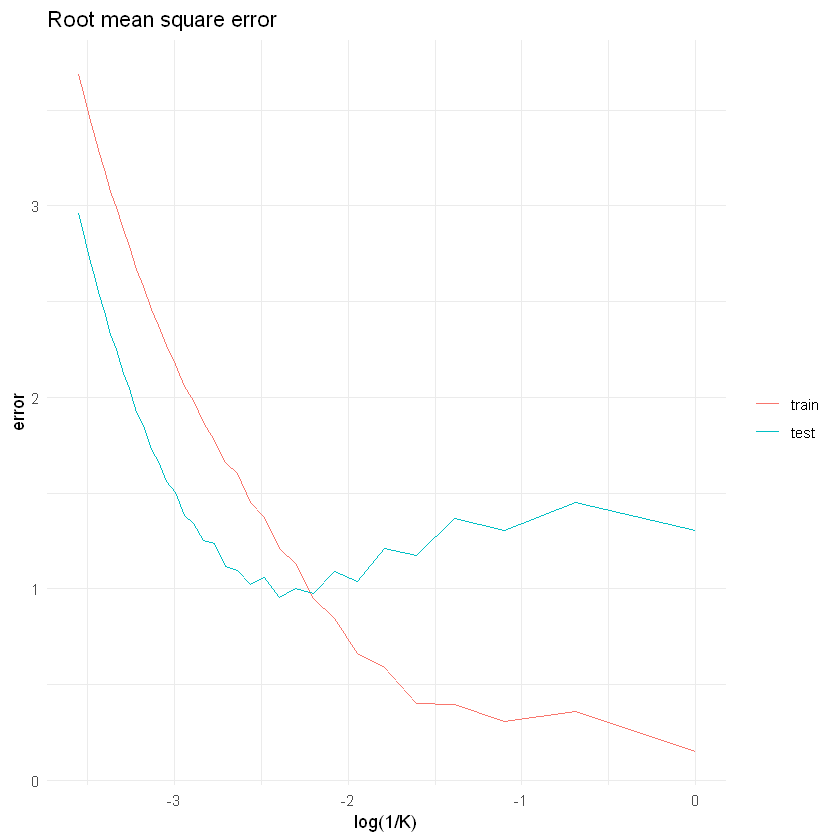

In [183]:
# plot RMSE of train and test data sets for k = 1:35
RMSE_all.m <- melt(RMSE_all, id='K') # reshape for visualization
names(RMSE_all.m) <- c('K', 'type', 'error')
ggplot(data=RMSE_all.m, aes(x=log(1/K), y=error, color=type)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Root mean square error")

### 3. Report  and discuss the optimum value for K in terms of the testing error. 

The root mean square error plot shows:
- Trainning error and test error intersects at around log(1/k) = -2.25.
- Before intersection: As k decreases, training error and testing error decreases.
- After intersection: As k decreases, training error test error decreases, testing error increases.

From the plot shown above, before the intersection of two error lines, both training and testing error is relatively high. The training error decreases after the interesction as testing error increases. 
In this case, the training error benefits from the decrease of k, which indicates a low bias when k is small. On the other hand, the testing error also benefits from the decrease of k, it decreases as k decreases, although testing error appears to increase after the intersection. In otherwords, the plot shows a bias-variance tradeoff. When the k value is small, the model has a small bias but large variance. If the k value increases, bias increases and variance decreases until the intersection point.

In terms of fitting, a low training error may leads to overfitting and a high training error may indicates underfitting. In this case, the large k values before the intersection lead to underfitting and the small k values after the intersection may cause overfitting. Therefore, the optimum value for k should lies around the intersection at log(1/k) = -2.25 on the plot.

As the optimum value for k is required to be decided in terms of the testing error, the goal is to minimize the testing error and variance while trying to avoid overfitting or underfitting. Thus, those extreme smaller k values are not suitable as they have high testing errors and low training errors, which may lead to overfitting. Therefore, the optimum value for k should be the intersection point if there is a applicable k value for the intersection point as the testing error at the intersection point is relatively low. Otherwise, the optimum value for k can be a value of k that is closest to the intersection point that has a low testing error and a plausible training error. E.g(If the requirement of the model is to be more generalized, a relatively larger training error is okay.)

In [184]:
# recall the RMSE table
RMSE_all

K,train,test
<int>,<dbl>,<dbl>
1,0.1499841,1.3036067
2,0.3596410,1.4506300
3,0.3064773,1.3055436
4,0.3960286,1.3668279
5,0.4004622,1.1735642
6,0.5899397,1.2082640
7,0.6644462,1.0396384
8,0.8438215,1.0902330
9,0.9476252,0.9748048


From the table the best k value matches the requirements is: k = 9, which is the intersection point.